<a href="https://colab.research.google.com/github/stevengregori92/Education-with-SVC/blob/main/Education_with_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns

#Import Data

In [ ]:
data = pd.read_csv('dataset.csv', index_col = 0)
data

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,,,,,,,,,,,,,,,,,,,,,
1,8,5,2,1,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,6,1,11,1,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
1,1,5,5,1,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,8,2,15,1,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
2,12,1,3,0,1,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,6,15,1,1,1,1,1,6,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
1,1,2,15,1,1,19,1,1,10,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
1,1,1,12,1,1,1,22,27,10,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout


#Explore Data

In [ ]:
len(data), len(data.dropna())

(4424, 4424)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 1 to 1
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Application mode                                4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Course                                          4424 non-null   int64  
 3   Daytime/evening attendance                      4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Nacionality                                     4424 non-null   int64  
 6   Mother's qualification                          4424 non-null   int64  
 7   Father's qualification                          4424 non-null   int64  
 8   Mother's occupation                             4424 non-null   int64  
 9   Father's occupation                         

In [ ]:
data.groupby('Target').mean()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Target,,,,,,,,,,,,,,,,,,,,,
Dropout,8.342013,1.593244,9.898663,0.854328,3.059113,1.250528,13.102745,16.716397,6.916256,7.256158,...,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
Enrolled,7.238035,1.625945,9.732997,0.905542,2.434509,1.309824,11.240554,15.502519,7.797229,8.591940,...,0.177582,0.358942,5.938287,9.435768,4.057935,11.117364,0.187657,11.272544,1.211713,0.053287
Graduate,5.824808,1.851064,9.959258,0.909009,2.226799,1.237211,12.208692,16.629697,7.403803,7.903576,...,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833


In [ ]:
data.isna().sum()

Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular u

#Analyze

Make the data

In [ ]:
X = data.drop(['Target'], axis = 1)
y = data['Target']

Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

StandardScaler

In [ ]:
stand = StandardScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

Train and Evaluate KNeighbor

In [ ]:
score = []

trainX = [X_train, X_train_stand]
testX = [X_test, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  svc = SVC()
  svc.fit(X_train_set, y_train)
  y_pred = svc.predict(X_test_set)
  score.append(accuracy_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score':score}, index = ['Organised', 'Standardized'])

,score
Organised,0.728752
Standardized,0.762206


In [ ]:
svc = SVC()

svc.fit(X_train, y_train)
perm_importance = permutation_importance(svc, X_test, y_test)
perm_importance.importances

array([[ 0.00904159,  0.00813743,  0.00723327,  0.00723327,  0.00271248],
       [ 0.        ,  0.00090416,  0.        ,  0.00180832,  0.        ],
       [ 0.01356239,  0.0045208 ,  0.00180832,  0.01084991,  0.00542495],
       [ 0.        ,  0.        ,  0.00090416,  0.        ,  0.        ],
       [ 0.00361664, -0.00090416,  0.00090416,  0.        ,  0.0045208 ],
       [ 0.        ,  0.        ,  0.        , -0.00090416,  0.        ],
       [ 0.00723327, -0.00090416,  0.00090416, -0.00090416,  0.00994575],
       [ 0.00180832,  0.00632911, -0.00180832,  0.00361664,  0.0045208 ],
       [ 0.00542495,  0.00361664,  0.00542495, -0.00090416,  0.0045208 ],
       [ 0.00723327,  0.00361664, -0.00090416,  0.        ,  0.00090416],
       [ 0.        ,  0.00090416,  0.        ,  0.        ,  0.00090416],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.00271248,  0.00090416,  0.00090416,  0.00090416],
       [ 0.00180832,  0.00180832,  0.0

#Visualize Data

<Axes: >

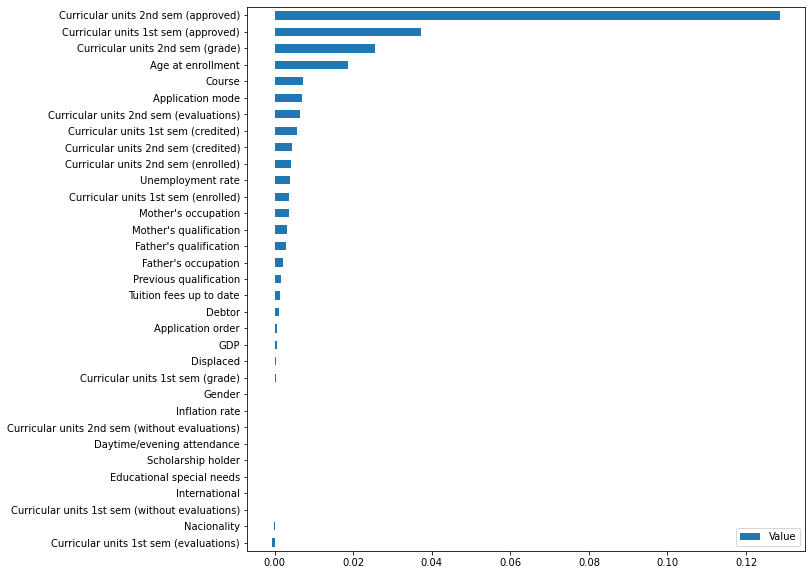

In [ ]:
sorted = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

#Insights
- In University, students who Graduate, Enrolled, and Dropout mostly influenced by Curricular units 2nd sem (approved).
- Students in 2nd Semester should:
  1. Attend classes regularly: Make sure to attend all classes and pay attention to the lectures. Take notes and ask questions if you need clarification on any topic.

  2. Stay organized: Keep track of assignments, deadlines, and important dates related to the course. Create a study schedule and stick to it.

  3. Participate in class discussions: Engage in class discussions and group activities. This will help you to understand the material better and gain new perspectives.

  4. Seek help when needed: Don't be afraid to ask for help from your professor, teaching assistant, or classmates if you are struggling with any aspect of the course.

  5. Practice regularly: Practice the concepts taught in class through problem sets, exercises, or other forms of practice.

  6. Review regularly: Review the material taught in class on a regular basis to keep it fresh in your mind.

  7. Get feedback: Seek feedback from your professor or teaching assistant on your performance in the course. This will help you to identify areas where you need to improve.

  8. Stay motivated: Keep a positive attitude towards the course and stay motivated. Celebrate small successes and keep pushing forward even when the going gets tough.

- This result was 77% accurate from RandomForestClassifier library.